#Redes Neuronales Recurrentes

La idea de las RRN es hacer uso de informacion secuencial. Esto es, para procesar datos en los cuales hay una dependencia de los datos procesados anteriormente; esto quiere decir que la red tiene un efecto de memoria a corto plazo y existe influencia de la salida "Y" del paso anterio en la entrada "X" del paso actual.

Se utiliza normalmente para la predicción de series de tiempo como predecir el precio de una acción dada la información actual y los precios recientes del dicha acción.




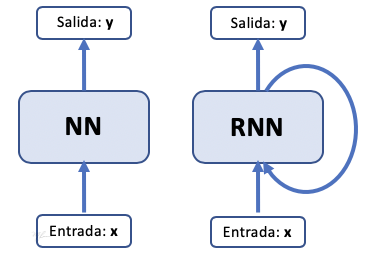

#LSTM
La forma más popular de entrenar a un RNN es mediante la “Backpropagation” en el tiempo. Sin embargo, el problema de los gradientes que desaparecen a menudo hace que los parámetros capturen dependencias a corto plazo mientras que la información de los pasos de tiempo anteriores decae. También puede ocurrir el problema inverso, gradientes explosivos, lo que hace que el error crezca drásticamente con cada paso de tiempo.


Los LSTM se destacan en el aprendizaje, procesamiento y clasificación de datos secuenciales. Las áreas comunes de aplicación incluyen análisis de sentimientos, modelado de lenguaje, reconocimiento de voz y análisis de video.

#Series de tiempo del precio del petroleo WTI (West Texas Intermediate)

https://mx.investing.com/commodities/crude-oil-historical-data

In [ ]:
#Importar las librerias que nos van a faciliar la vida! :)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Se importan los datos desde un archivo de EXCEL
dataset = pd.read_excel('datos_plata.xlsx', index_col='Fecha', parse_dates=['Fecha'])
print(dataset)

In [ ]:
#Los datos de entrenamiento y de validatción se agrupan en dos variables (antes del 2019 y 2019 para la validación)

# Ejercicio  <------------------------------*
set_entrenamiento = dataset[:'2017'].iloc[:,1:2]
set_validacion = dataset['2018':].iloc[:,1:2]
print(set_entrenamiento, set_validacion)

plt.figure(figsize=(25,9))
set_entrenamiento['Apertura'].plot(legend=True)
set_validacion['Apertura'].plot(legend=True)
plt.legend(['Entrenamiento', 'Validación'])
plt.figure(figsize=(20,9))
plt.show()

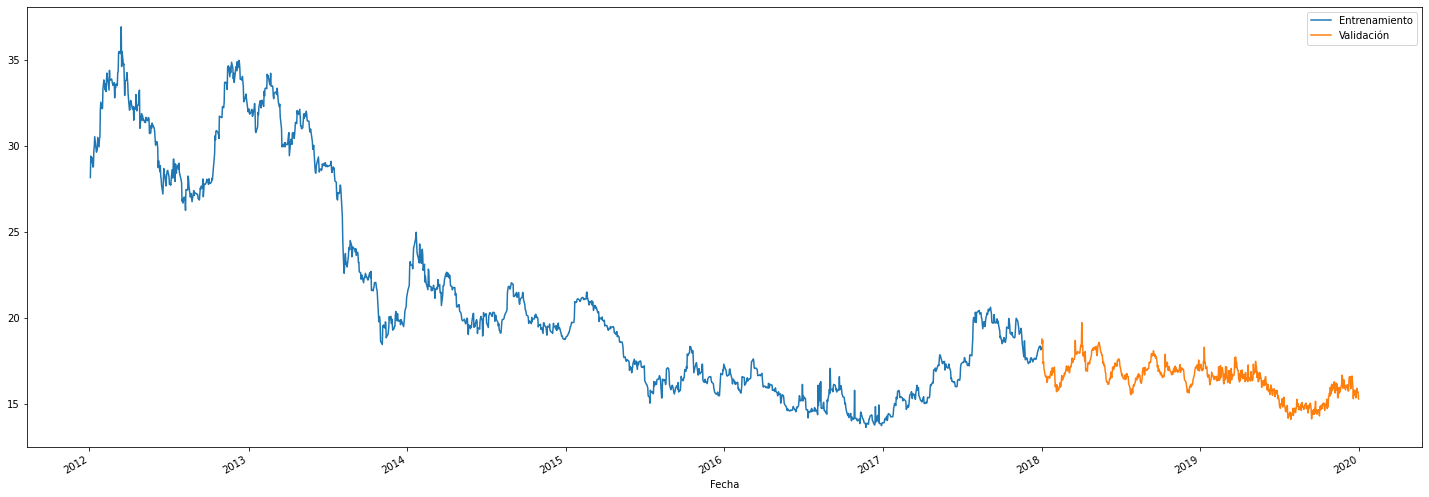

In [ ]:
# Normalización de los datos de entrada para el entrenamiento
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

print(set_entrenamiento_escalado.max())

#time_step es el número de datos necesarios para generar una predicción

time_step = 100
X_train = []
Y_train = []
lim = len(set_entrenamiento_escalado)

for i in range(time_step,lim):
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape, Y_train.shape

In [ ]:
# Keras necesita saber de que tamaño es la matriz de entrada, explcitamente, por lo tanto se tiene que redimencionalizar
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

In [ ]:
# Cada serie de entrada tiene esta cantidadad de entradas, para una predicción
print((X_train.shape[1],1))

In [ ]:
# Construcción de la Red LSTM (Long Short-Term Memory) Network...

din = (X_train.shape[1],1)
dout = 1
na = 150

#Se inicia el modelo
model = Sequential()

# Ejercicio <--------------------------------------*
#Se genera la capa LSTM
model.add(LSTM(units=na, input_shape=din, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=na, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=na))
model.add(Dropout(0.2))

#Capa de una sola salida
model.add(Dense(units=dout))

#Compilamos el modelo con optimisador 'rmsprop' y loss 'mse'
model.compile(optimizer='rmsprop', loss='mse')

model.summary()

In [ ]:
#finalmente se entrena el modelo con 100 epocas o las que se quieran intentar...
model.fit(X_train,Y_train,epochs=100)

In [ ]:
# Validación (¿Que tan bueno será el modelo para predecir valores que nosotros ya sabemos como sucedieron?)
# primero hay que normalizar los datos igual que los datos de prueba

x_test = set_validacion.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

In [ ]:
#Calculo de la preicción del modelo

prediccion = model.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
prediccion.shape, set_validacion.shape

In [ ]:
# Grafica de los datos
def graficas(almanaque, prediccion):

    plt.figure(figsize=(20,9))
    plt.plot(almanaque[0:len(prediccion)],color='red', label='Valor real ')
    plt.plot(prediccion, color='blue', label='Predicción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo (dias)')
    plt.ylabel('$')
    plt.legend()
    plt.show()

In [ ]:
# Graficar resultados
graficas(set_validacion.values,prediccion)

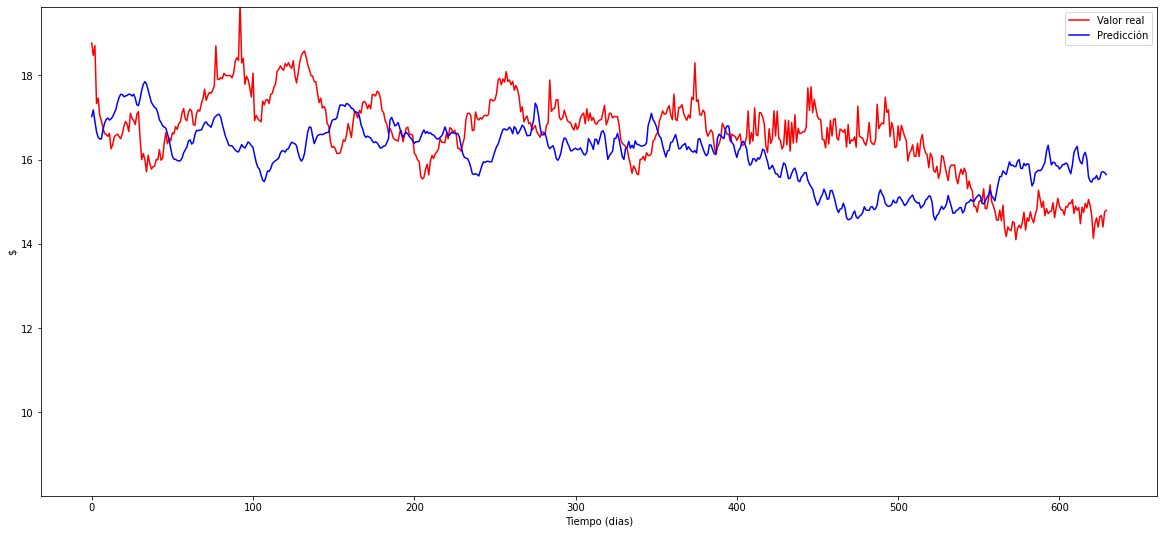

MSc. Arturo García-Amador

Student at CICESE in the Master of Computer Science program.

3918. Carretera Ensenada - Tijuana
Zona Playitas,
Ensenada, BC. 22860

